In [2]:
import nltk
import pandas as pd

from nltk.translate.bleu_score import SmoothingFunction

**Bleu scores without smoothing:**

In [9]:
results_list = ['results_20k_filtered_l500_e50.csv',
                'results_20k_tokenized_l500_b64.csv',
                'results_30k_tokenized_l500_b64.csv',
                'results_60k_tokenized_l500_e50.csv']

for result in results_list:
  data = pd.read_csv(result)
  hypotheses = data['Predicted comment']
  references = data['Original Comment']
  list_of_references = references.tolist()
  list_of_hypotheses = hypotheses.tolist()

  sentence_based_references = [reference.split(' ') for reference in list_of_references]
  sentence_based_hypotheses = [hypothesis.split(' ') for hypothesis in list_of_hypotheses]
  print("\nFile name: ", result)

  bleu_score_c = nltk.translate.bleu_score.corpus_bleu(sentence_based_references, sentence_based_hypotheses)
  print("\nBleu Score: ", bleu_score_c)


File name:  results_20k_filtered_l500_e50.csv


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)



Bleu Score:  0.05713205093790273

File name:  results_20k_tokenized_l500_b64.csv


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)



Bleu Score:  0.42635675627942693

File name:  results_30k_tokenized_l500_b64.csv

Bleu Score:  0.4234169047388888

File name:  results_60k_tokenized_l500_e50.csv

Bleu Score:  0.4168127493746392


**Bleu scores with smoothing:**

In [ ]:
bleu_list = []
for result in results_list:
  data = pd.read_csv(result)
  hypotheses = data['Predicted comment']
  references = data['Original Comment']

  list_of_references = references.tolist()
  list_of_hypotheses = hypotheses.tolist()

  sentence_based_references = [reference.split(' ') for reference in list_of_references]
  sentence_based_hypotheses = [hypothesis.split(' ') for hypothesis in list_of_hypotheses]
  print("\nFile name: ", result)

  sm_fn = SmoothingFunction().method4
  bleu_score_c = nltk.translate.bleu_score.corpus_bleu(list_of_references, list_of_hypotheses, smoothing_function=sm_fn)
  bleu_list.append(bleu_score_c)
  print("\nCorpus-level Bleu Score: ", bleu_score_c)


File name:  results_20k_filtered_l500_e50.csv

Corpus-level Bleu Score:  0.27889452010804583

File name:  results_20k_tokenized_l500_b64.csv

Corpus-level Bleu Score:  0.2953094957791

File name:  results_30k_tokenized_l500_b64.csv

Corpus-level Bleu Score:  0.30446447843101304

File name:  results_60k_tokenized_l500_e50.csv

Corpus-level Bleu Score:  0.27729888864725116


No handles with labels found to put in legend.


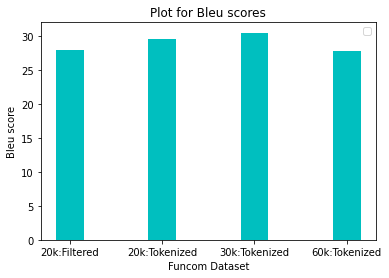

In [ ]:
import matplotlib.pyplot as plt

x1 = ['20k:Filtered', '20k:Tokenized', '30k:Tokenized', '60k:Tokenized']
y1 = [bleu*100 for bleu in bleu_list]

plt.bar(x1, y1, color='c', align='center', width=0.3)
plt.plot()

plt.xlabel("Funcom Dataset")
plt.ylabel("Bleu score")
plt.title("Plot for Bleu scores")
plt.legend()
plt.show()

**Meteor scores:**

In [7]:
!pip install py-rouge

In [21]:
import rouge
import nltk
nltk.download('punkt')

#reference: https://pypi.org/project/py-rouge/
def prepare_results(p, r, f):
    return '\t{}:\t{}: {:5.2f}\t{}: {:5.2f}\t{}: {:5.2f}'.format(metric, 'P', 100.0 * p, 'R', 100.0 * r, 'F1', 100.0 * f)

for aggregator in ['Avg', 'Best', 'Individual']:
    print('Evaluation with {}'.format(aggregator))
    apply_avg = aggregator == 'Avg'
    apply_best = aggregator == 'Best'

    evaluator = rouge.Rouge(metrics=['rouge-n', 'rouge-l', 'rouge-w'],
                           max_n=4,
                           limit_length=True,
                           length_limit=100,
                           length_limit_type='words',
                           apply_avg=apply_avg,
                           apply_best=apply_best,
                           alpha=0.5, # Default F1_score
                           weight_factor=1.2,
                           stemming=True)

    for result in results_list:
      data = pd.read_csv(result)
      hypotheses = data['Predicted comment']
      references = data['Original Comment']

      all_hypothesis = hypotheses.tolist()
      all_references = references.tolist()

      scores = evaluator.get_scores(all_hypothesis, all_references)

      print("\n\nScores for ", result)
      data_scores = pd.DataFrame.from_dict(scores)
      print(data_scores.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Evaluation with Avg


Scores for  results_20k_filtered_l500_e50.csv
    rouge-2   rouge-1   rouge-3   rouge-4   rouge-l   rouge-w
f  0.206821  0.365112  0.149201  0.122394  0.392163  0.223614
p  0.228766  0.421889  0.160378  0.130648  0.437701  0.346327
r  0.209882  0.378891  0.148822  0.121395  0.403164  0.192304


Scores for  results_20k_tokenized_l500_b64.csv
    rouge-2   rouge-1   rouge-3   rouge-4   rouge-l   rouge-w
f  0.231754  0.411554  0.160793  0.127724  0.447659  0.307128
p  0.240033  0.429835  0.165380  0.130638  0.462114  0.395520
r  0.238873  0.424528  0.163998  0.128655  0.458375  0.271544


Scores for  results_30k_tokenized_l500_b64.csv
    rouge-2   rouge-1   rouge-3   rouge-4   rouge-l   rouge-w
f  0.202988  0.393215  0.123508  0.090495  0.429414  0.287109
p  0.214553  0.418716  0.129157  0.094222  0.450406  0.379475
r  0.208519  0.400833  0.124328  0.089865